In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
Trainpath = '/content/drive/MyDrive/is that santa/train'
Testpath = '/content/drive/MyDrive/is that santa/test'
x_Train = []
y_Train = []
x_Test = []
y_Test = []

label_name = {0: 'not-a-santa', 1: 'santa'}
print("Start data processing . . .")
##Train##
for label, folder in label_name.items():
    path = os.path.join(Trainpath, folder)
    for img in os.listdir(path):
        imgtrain = cv2.imread(os.path.join(path, img))
        height, width = imgtrain.shape[:2]
        if height > width:
            new_height = 256
            new_width = int(width * (256 / height))
        else:
            new_width = 256
            new_height = int(height * (256 / width))
        imgtrain = cv2.resize(imgtrain, (new_width, new_height))
        top = (256 - new_height) // 2
        bottom = 256 - new_height - top
        left = (256 - new_width) // 2
        right = 256 - new_width - left
        imgtrain = cv2.copyMakeBorder(imgtrain, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0, 0))
        x_Train.append(imgtrain)
        y_Train.append(label)
print("Train data processing completed!")

##Test##
for label, folder in label_name.items():
    path = os.path.join(Testpath, folder)
    for img in os.listdir(path):
        imgtest = cv2.imread(os.path.join(path, img))
        height, width = imgtest.shape[:2]
        if height > width:
            new_height = 256
            new_width = int(width * (256 / height))
        else:
            new_width = 256
            new_height = int(height * (256 / width))
        imgtest = cv2.resize(imgtest, (new_width, new_height))
        top = (256 - new_height) // 2
        bottom = 256 - new_height - top
        left = (256 - new_width) // 2
        right = 256 - new_width - left
        imgtest = cv2.copyMakeBorder(imgtest, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0, 0))
        x_Test.append(imgtest)
        y_Test.append(label)
print("Test data processing completed!")

Start data processing . . .
Train data processing completed!
Test data processing completed!


In [3]:
# 將列表轉為 NumPy 數列
x_Train_array = np.array(x_Train)
x_Test_array = np.array(x_Test)
y_Train = np.array(y_Train)
y_Test = np.array(y_Test)

# 將影像的特徵值轉換為4維矩陣
x_Train4D = x_Train_array.reshape(x_Train_array.shape[0], 256, 256, 3).astype('float32')
x_Test4D = x_Test_array.reshape(x_Test_array.shape[0], 256, 256, 3).astype('float32')

## 數字影像特徵值標準化
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = to_categorical(y_Train)
y_TestOneHot = to_categorical(y_Test)

In [4]:
model = Sequential()

# 添加卷積層和池化層
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(256, 256, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 36)      5220      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 36)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 64, 64, 36)        0         
                                                                 
 flatten (Flatten)           (None, 147456)            0

In [5]:
train_history=model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.15, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
27/27 [==============================] - 16s 94ms/step - loss: 2.5808 - accuracy: 0.6962 - val_loss: 0.5135 - val_accuracy: 0.8243
Epoch 2/20
27/27 [==============================] - 2s 64ms/step - loss: 0.4204 - accuracy: 0.8337 - val_loss: 0.2488 - val_accuracy: 0.9392
Epoch 3/20
27/27 [==============================] - 2s 64ms/step - loss: 0.2481 - accuracy: 0.8983 - val_loss: 0.2751 - val_accuracy: 0.8851
Epoch 4/20
27/27 [==============================] - 2s 59ms/step - loss: 0.1758 - accuracy: 0.9318 - val_loss: 0.7675 - val_accuracy: 0.6824
Epoch 5/20
27/27 [==============================] - 2s 59ms/step - loss: 0.1294 - accuracy: 0.9510 - val_loss: 0.2670 - val_accuracy: 0.8851
Epoch 6/20
27/27 [==============================] - 2s 57ms/step - loss: 0.0957 - accuracy: 0.9617 - val_loss: 0.2986 - val_accuracy: 0.8649
Epoch 7/20
27/27 [==============================] - 2s 57ms/step - loss: 0.0557 - accuracy: 0.9868 - val_loss: 0.1771 - val_accuracy: 0.9189
Epoch 8/20
2

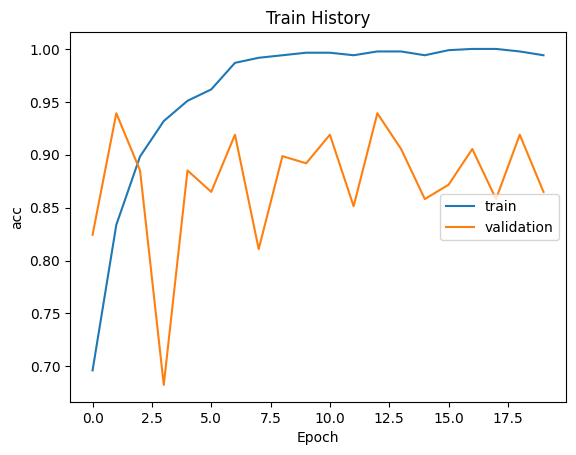

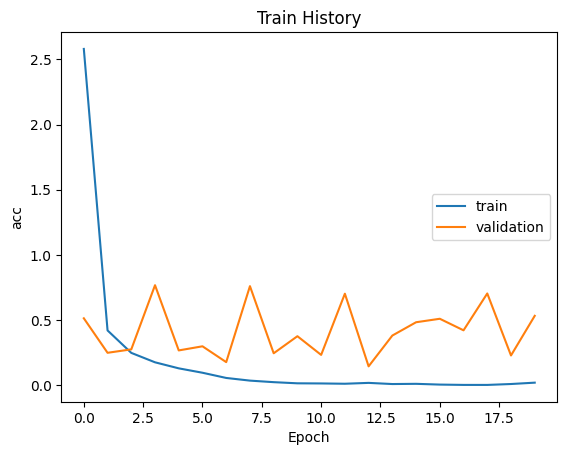

In [6]:
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train History')
  plt.ylabel('acc')
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='center right')
  plt.show()


show_train_history(train_history, 'accuracy', 'val_accuracy')

show_train_history(train_history, 'loss', 'val_loss')


In [7]:
## 評估模型準確率：將處理過的測試資料放入model.evaluate()中評估模型準確率
loss, accuracy = model.evaluate(x_Test4D_normalize , y_TestOneHot)
print( "\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy* 100 ))

8/8 [==============================] - 0s 47ms/step - loss: 0.6103 - accuracy: 0.8618

Loss: 0.61, Accuracy: 86.18%


In [8]:
#y_Test_OneHot = to_categorical(y_Test, num_classes=2)
prediction=np.argmax(model.predict(x_Test4D_normalize), axis=1)
conf_matrix = confusion_matrix(np.argmax(y_TestOneHot, axis=1), prediction)
print("Confusion Matrix:")
print(conf_matrix)

8/8 [==============================] - 0s 16ms/step
Confusion Matrix:
[[109  14]
 [ 20 103]]
